# **Load & Clean the Dataset**

In [104]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv', encoding='ISO-8859-1')

# Show basic info
print(df.info())

# Parse dates
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Handle missing values
df = df.dropna()  # or use df.fillna() based on inspection


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [105]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Row ID,9994.0,4997.5,1.0,2499.25,4997.5,7495.75,9994.0,2885.163629
Order Date,9994,2016-04-30 00:07:12.259355648,2014-01-03 00:00:00,2015-05-23 00:00:00,2016-06-26 00:00:00,2017-05-14 00:00:00,2017-12-30 00:00:00,NaN
Postal Code,9994.0,55190.379428,1040.0,23223.0,56430.5,90008.0,99301.0,32063.69335
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101
Quantity,9994.0,3.789574,1.0,2.0,3.0,5.0,14.0,2.22511
Discount,9994.0,0.156203,0.0,0.0,0.2,0.2,0.8,0.206452
Profit,9994.0,28.656896,-6599.978,1.72875,8.6665,29.364,8399.976,234.260108


# **Check Info And Missing Values**

In [106]:
# Check info
df.info()
print(f'the number of rows is : {df.shape[0]} \nThe number of columns is : {df.shape[1]} '.upper() )

# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Check missing values
df.isnull().sum()

# Drop rows with missing values (if any)
df.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [107]:
df.duplicated().any()

np.False_

In [108]:
pd.DataFrame({
   'Countd' :df.shape[0] ,
   'Null' : df.isnull().sum() ,
   'Null%' : df.isnull().mean()*100 ,
   'cardinality' : df.nunique()
})


,Countd,Null,Null%,cardinality
Row ID,9994,0,0.0,9994
Order ID,9994,0,0.0,5009
Order Date,9994,0,0.0,1237
Ship Date,9994,0,0.0,1334
Ship Mode,9994,0,0.0,4
Customer ID,9994,0,0.0,793
Customer Name,9994,0,0.0,793
Segment,9994,0,0.0,3
Country,9994,0,0.0,1
City,9994,0,0.0,531


In [41]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_DayOfWeek'] = df['Order Date'].dt.dayofweek  # 0 = Monday
df['Order_Week'] = df['Order Date'].dt.isocalendar().week
df['Is_Weekend'] = df['Order_DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)


**Category Sales**

In [109]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(category_sales)


Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


In [7]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(region_sales)


Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64


In [12]:
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()
print(monthly_sales)


/tmp/ipykernel_10/195119647.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


Order Date
2014-01-31     14236.8950
2014-02-28      4519.8920
2014-03-31     55691.0090
2014-04-30     28295.3450
2014-05-31     23648.2870
2014-06-30     34595.1276
2014-07-31     33946.3930
2014-08-31     27909.4685
2014-09-30     81777.3508
2014-10-31     31453.3930
2014-11-30     78628.7167
2014-12-31     69545.6205
2015-01-31     18174.0756
2015-02-28     11951.4110
2015-03-31     38726.2520
2015-04-30     34195.2085
2015-05-31     30131.6865
2015-06-30     24797.2920
2015-07-31     28765.3250
2015-08-31     36898.3322
2015-09-30     64595.9180
2015-10-31     31404.9235
2015-11-30     75972.5635
2015-12-31     74919.5212
2016-01-31     18542.4910
2016-02-29     22978.8150
2016-03-31     51715.8750
2016-04-30     38750.0390
2016-05-31     56987.7280
2016-06-30     40344.5340
2016-07-31     39261.9630
2016-08-31     31115.3743
2016-09-30     73410.0249
2016-10-31     59687.7450
2016-11-30     79411.9658
2016-12-31     96999.0430
2017-01-31     43971.3740
2017-02-28     20301.1334
2

In [13]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(5)
print(subcat_profit)


Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Name: Profit, dtype: float64


# **Data Visualization**

<Axes: xlabel='Ship Mode', ylabel='count'>

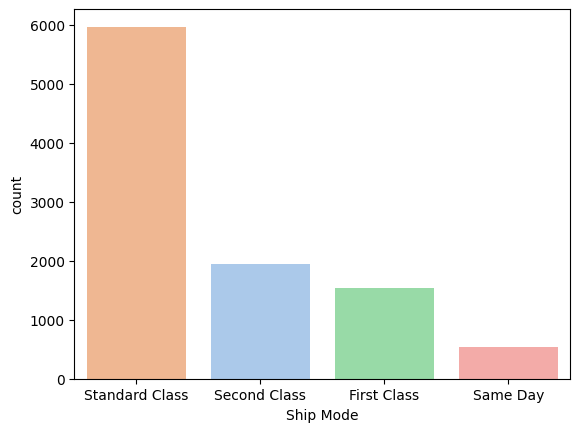

In [15]:
sns.countplot(data=df, x=col, hue=col, order=df[col].value_counts().index, palette='pastel', legend=False)


In [17]:
import warnings
warnings.filterwarnings("ignore")


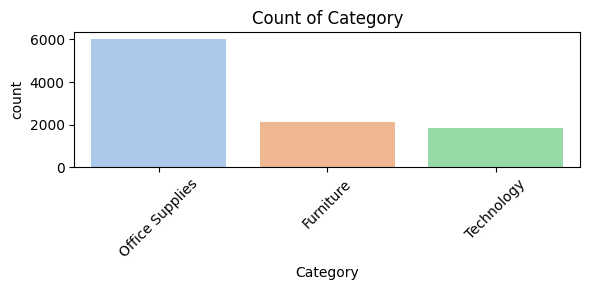

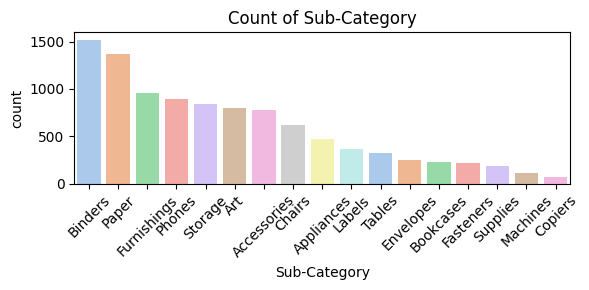

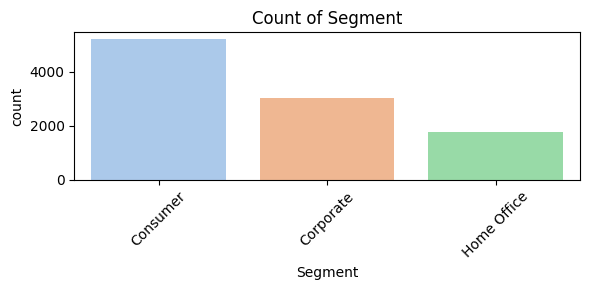

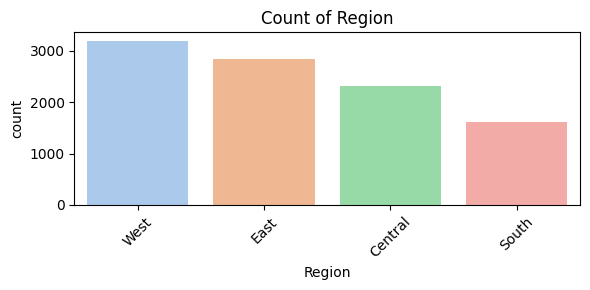

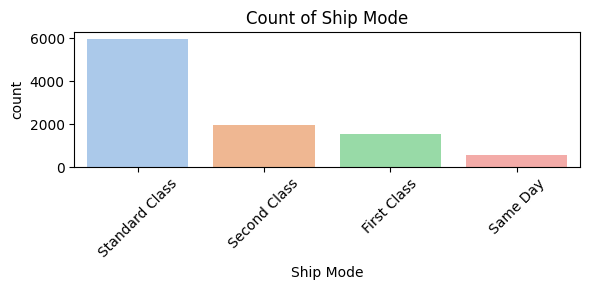

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['Category', 'Sub-Category', 'Segment', 'Region', 'Ship Mode']

for col in categorical_features:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


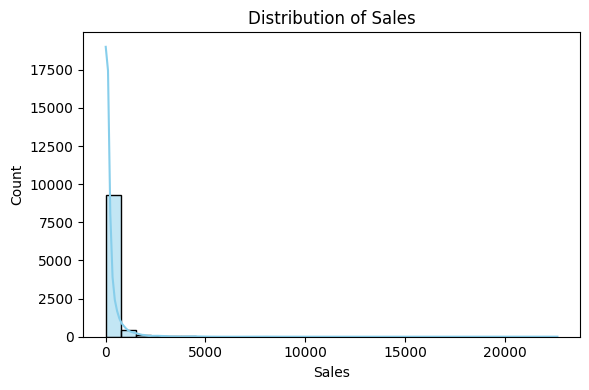

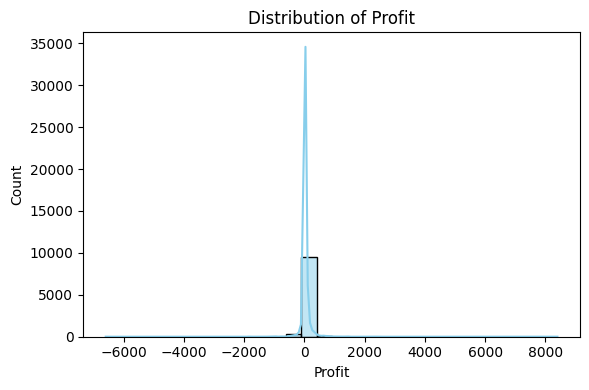

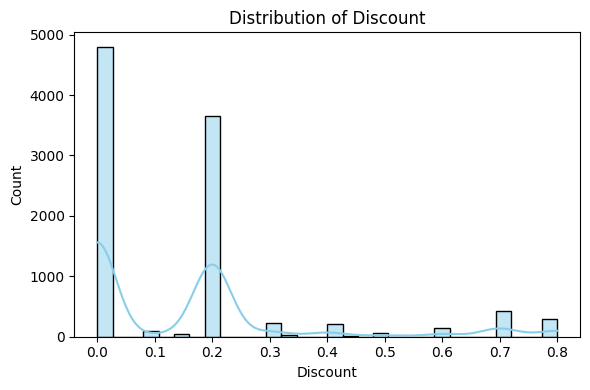

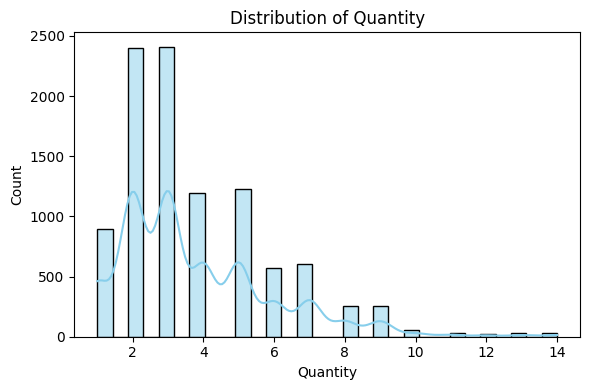

In [19]:
numeric_features = ['Sales', 'Profit', 'Discount', 'Quantity']

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


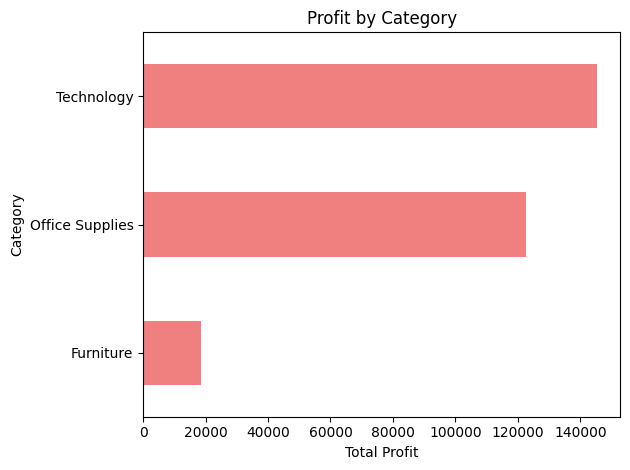

In [20]:
category_profit = df.groupby('Category')['Profit'].sum().sort_values()
category_profit.plot(kind='barh', color='lightcoral')
plt.title('Profit by Category')
plt.xlabel('Total Profit')
plt.tight_layout()
plt.show()


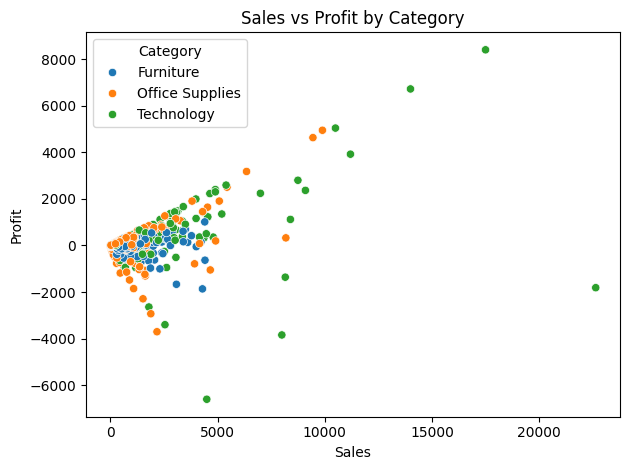

In [21]:
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Category')
plt.title('Sales vs Profit by Category')
plt.tight_layout()
plt.show()


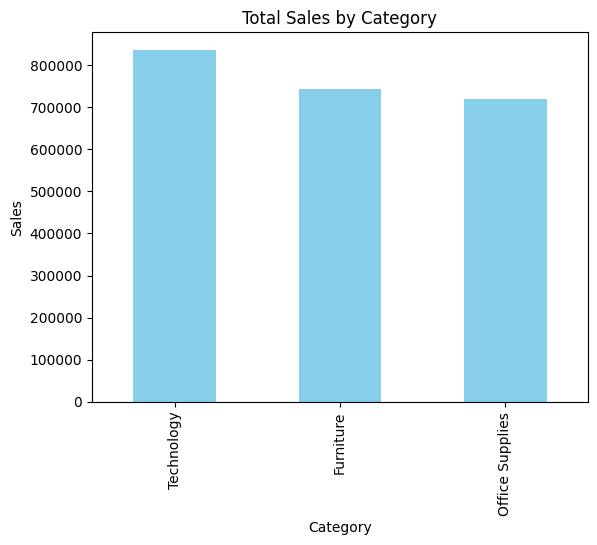

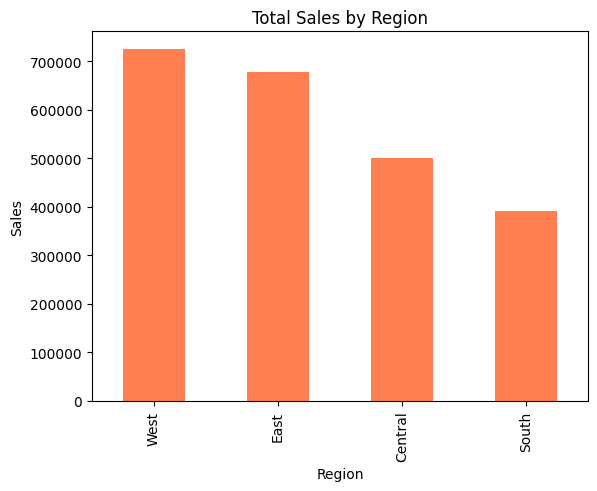

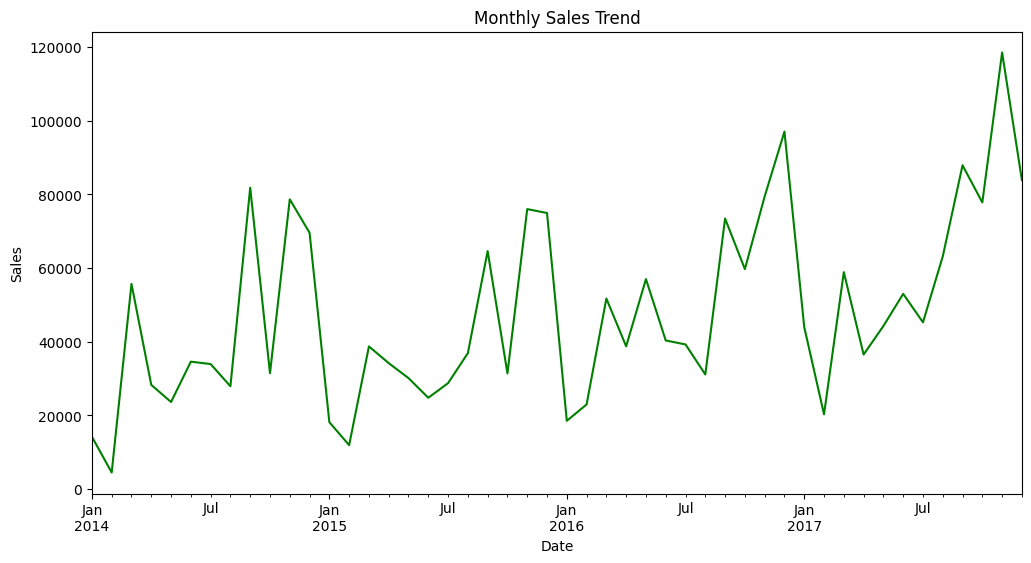

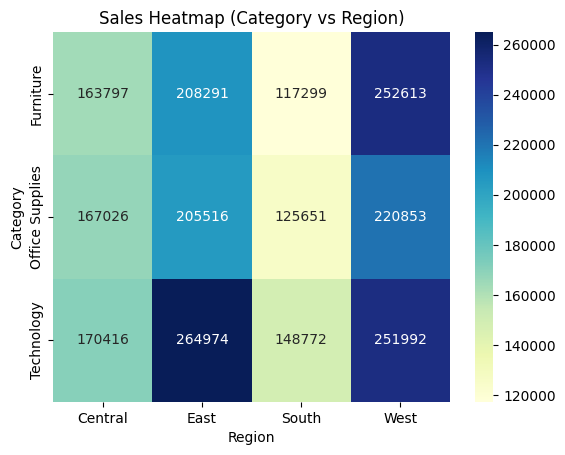

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart: Sales by Category
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.xlabel('Category')
plt.show()

# Bar chart: Sales by Region
region_sales.plot(kind='bar', color='coral')
plt.title('Total Sales by Region')
plt.ylabel('Sales')
plt.xlabel('Region')
plt.show()

# Line chart: Monthly Sales Trend
monthly_sales.plot(figsize=(12,6), color='green')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.show()

# Heatmap: Sales by Category and Region
pivot = df.pivot_table(values='Sales', index='Category', columns='Region', aggfunc='sum')
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Sales Heatmap (Category vs Region)')
plt.show()


# ***Exploratory Data Analysis***

# **Normalize The Data Values**

In [52]:
# Compute correlation matrix
normalized_corr = df_normalized.corr()

# Display matrix
print(normalized_corr)


                      Sales_norm  Profit_norm  Discount_norm  Quantity_norm  \
Sales_norm              1.000000     0.479064      -0.028190       0.200795   
Profit_norm             0.479064     1.000000      -0.219487       0.066253   
Discount_norm          -0.028190    -0.219487       1.000000       0.008623   
Quantity_norm           0.200795     0.066253       0.008623       1.000000   
Profit Margin_norm      0.003444     0.223732      -0.864452      -0.005280   
Sales Per Item_norm     0.889376     0.468312      -0.032803      -0.003148   
Profit Per Item_norm    0.447319     0.912199      -0.232313      -0.007209   

                      Profit Margin_norm  Sales Per Item_norm  \
Sales_norm                      0.003444             0.889376   
Profit_norm                     0.223732             0.468312   
Discount_norm                  -0.864452            -0.032803   
Quantity_norm                  -0.005280            -0.003148   
Profit Margin_norm              1.000000  

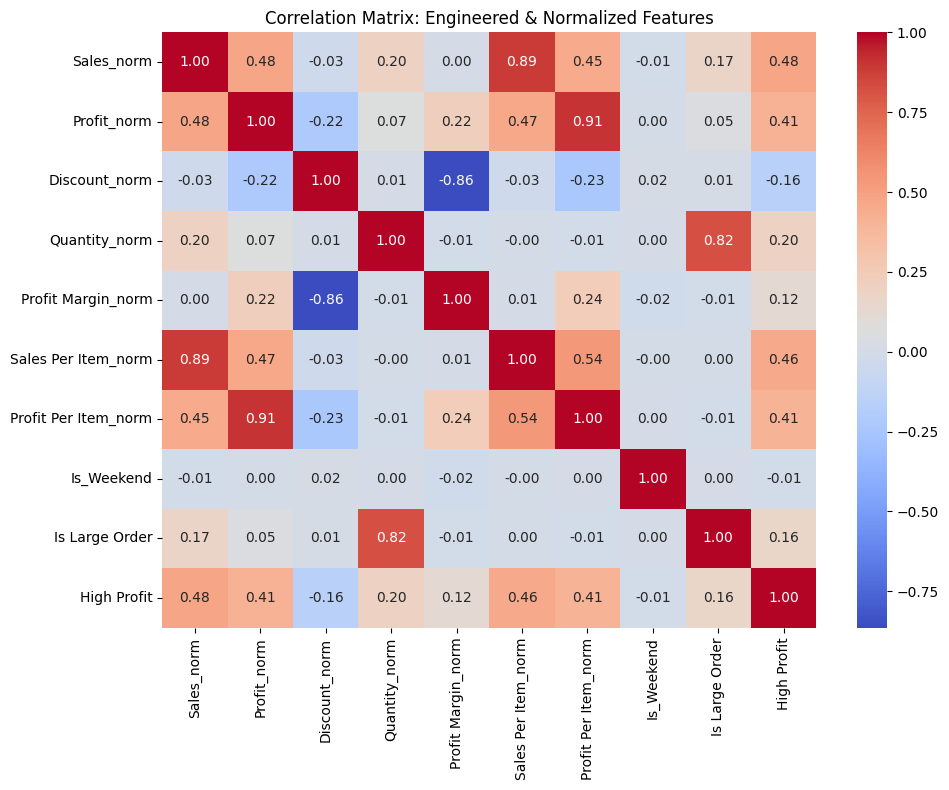

In [53]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Drop infinite and NaN values
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df.dropna(subset=['Sales', 'Profit', 'Discount', 'Quantity', 'Profit Margin', 'Sales Per Item', 'Profit Per Item'], inplace=True)

# Normalize selected features
features_to_normalize = ['Sales', 'Profit', 'Discount', 'Quantity', 'Profit Margin', 'Sales Per Item', 'Profit Per Item']
scaler = MinMaxScaler()
normalized = scaler.fit_transform(df[features_to_normalize])
df_normalized = pd.DataFrame(normalized, columns=[f"{col}_norm" for col in features_to_normalize])

# Add engineered binary features
df_engineered = pd.concat([df_normalized, df[['Is_Weekend', 'Is Large Order', 'High Profit']].reset_index(drop=True)], axis=1)

# Compute and plot correlation matrix
corr = df_engineered.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Engineered & Normalized Features')
plt.tight_layout()
plt.show()


In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Sales_norm', 'Profit_norm', 'Discount_norm', 'Quantity_norm']] = scaler.fit_transform(df[['Sales', 'Profit', 'Discount', 'Quantity']])


In [55]:
df['Profit Margin'] = df['Profit'] / df['Sales']

df['Discount Bin'] = pd.cut(df['Discount'], bins=[-0.01, 0, 0.2, 0.4, 0.6, 1.0],
                            labels=['No Discount', 'Low', 'Medium', 'High', 'Extreme'])

df['Is Large Order'] = df['Quantity'].apply(lambda x: 1 if x >= 5 else 0)

df['Sales Per Item'] = df['Sales'] / df['Quantity']

df[['Sales', 'Profit', 'Quantity', 'Profit Margin', 'Sales Per Item']].corr()


,Sales,Profit,Quantity,Profit Margin,Sales Per Item
Sales,1.000000,0.479064,0.200795,0.003444,0.889376
Profit,0.479064,1.000000,0.066253,0.223732,0.468312
Quantity,0.200795,0.066253,1.000000,-0.005280,-0.003148
Profit Margin,0.003444,0.223732,-0.005280,1.000000,0.007044
Sales Per Item,0.889376,0.468312,-0.003148,0.007044,1.000000


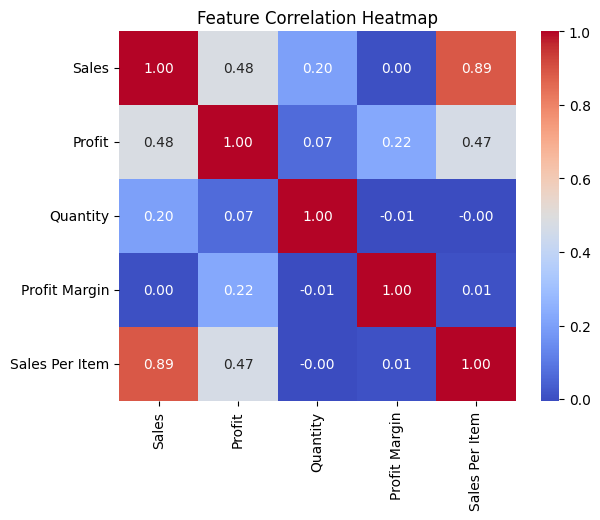

In [56]:
corr = df[['Sales', 'Profit', 'Quantity', 'Profit Margin', 'Sales Per Item']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


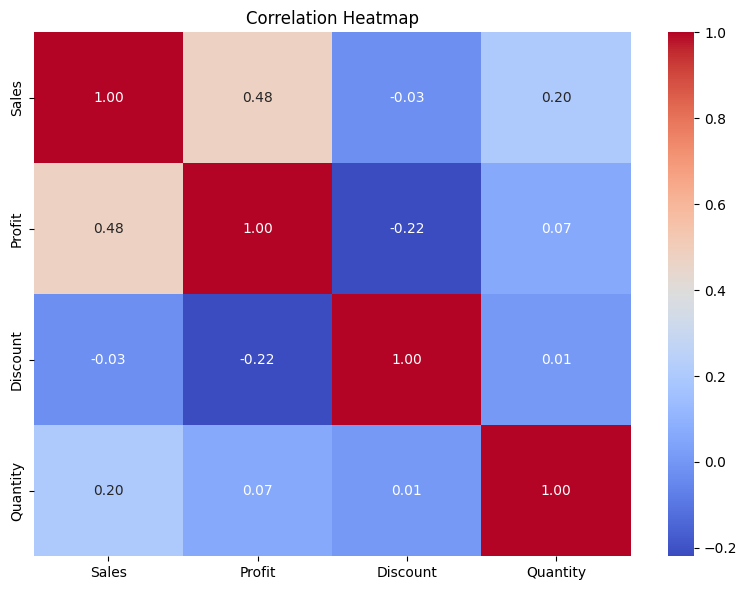

In [57]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


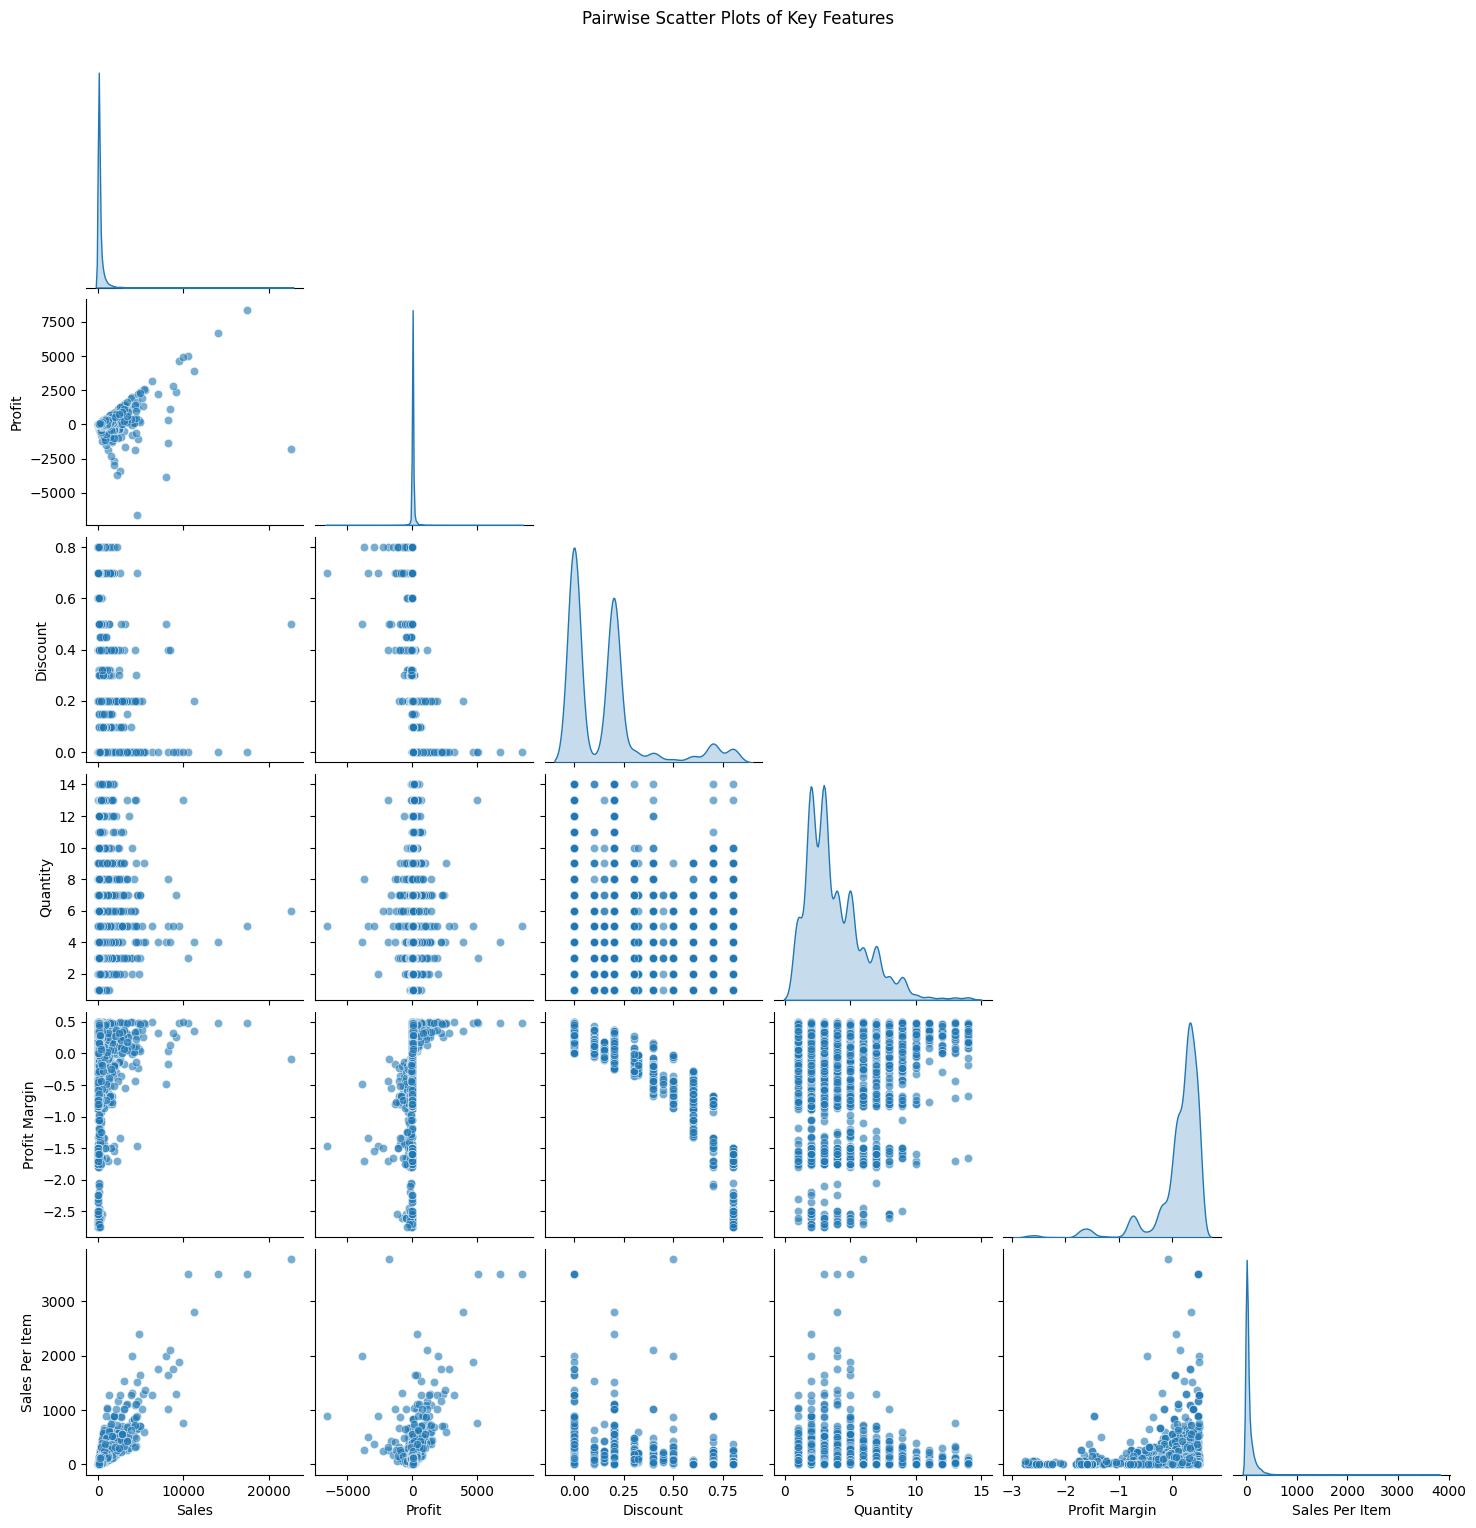

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure features are available
features = ['Sales', 'Profit', 'Discount', 'Quantity']
if 'Profit Margin' in df.columns:
    features.append('Profit Margin')
if 'Sales Per Item' in df.columns:
    features.append('Sales Per Item')

# Plot pairwise relationships
sns.pairplot(df[features], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Scatter Plots of Key Features', y=1.02)
plt.show()


# **Feature Engineering**

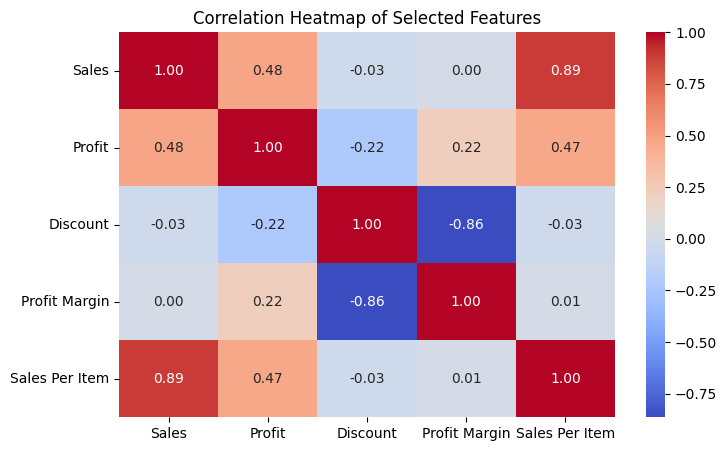

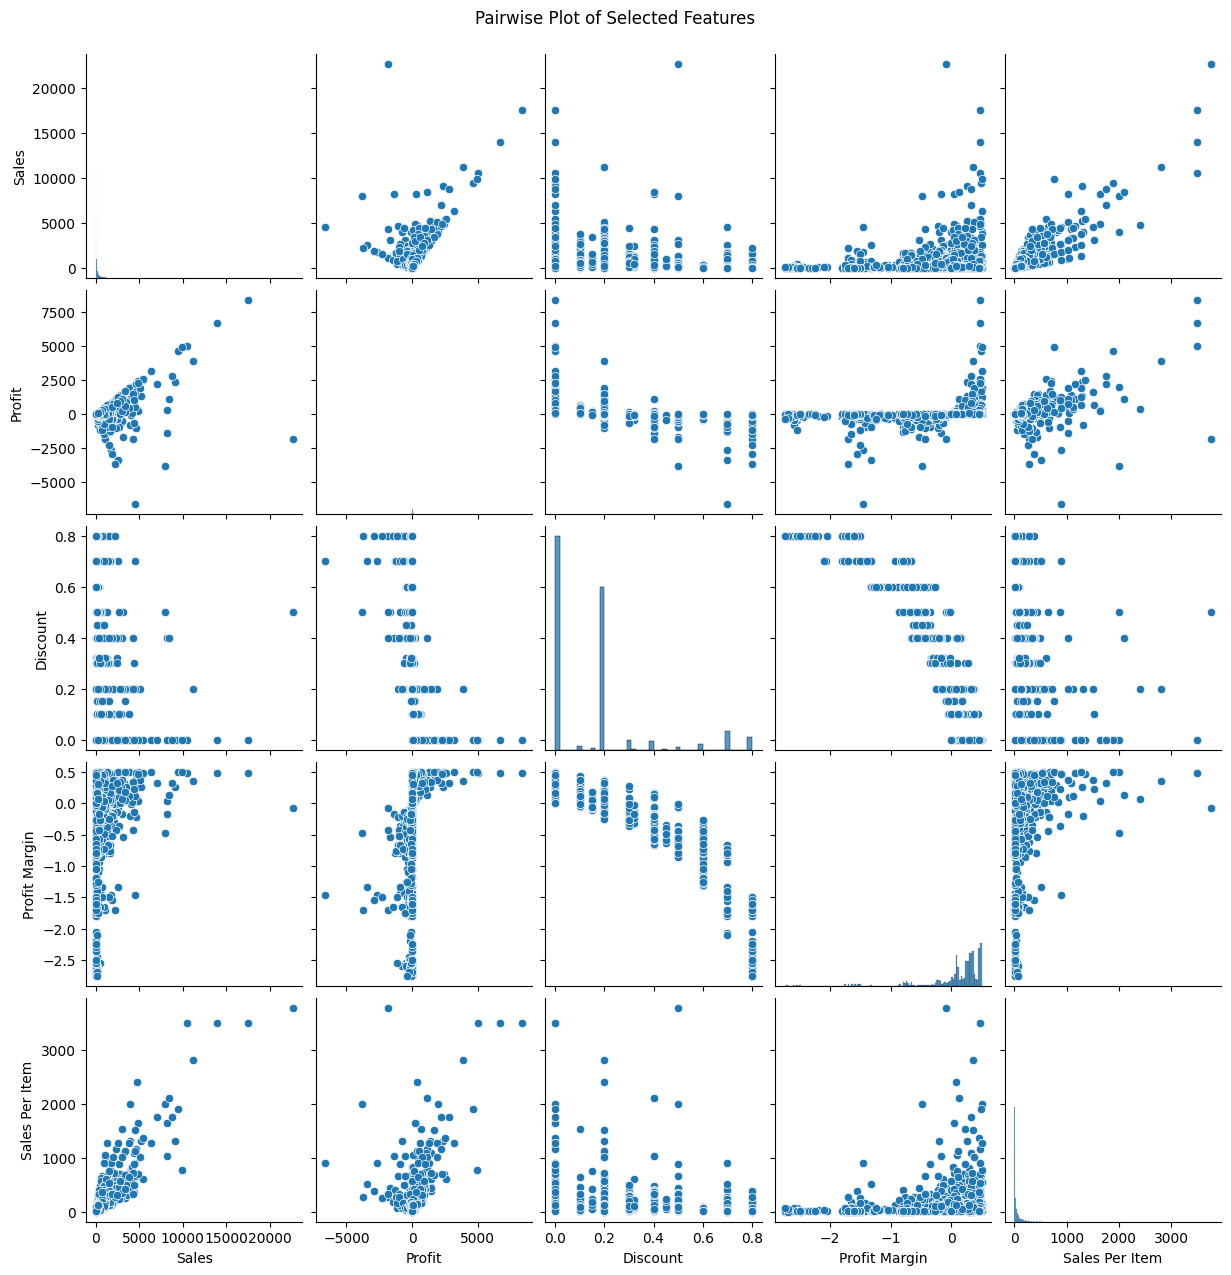

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ['Sales', 'Profit', 'Discount', 'Profit Margin', 'Sales Per Item']

# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

# Pair plot for visual relationships
sns.pairplot(df[selected_features])
plt.suptitle("Pairwise Plot of Selected Features", y=1.02)
plt.show()


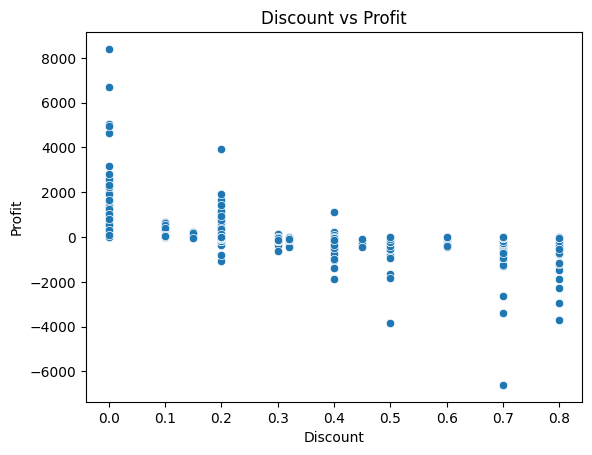

In [44]:
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Discount vs Profit')
plt.show()


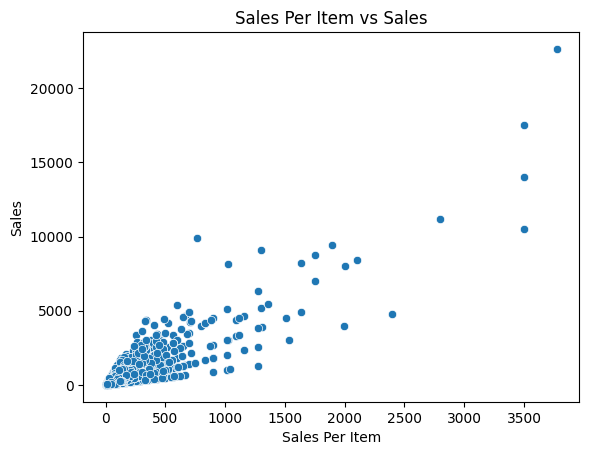

In [45]:
sns.scatterplot(data=df, x='Sales Per Item', y='Sales')
plt.title('Sales Per Item vs Sales')
plt.show()


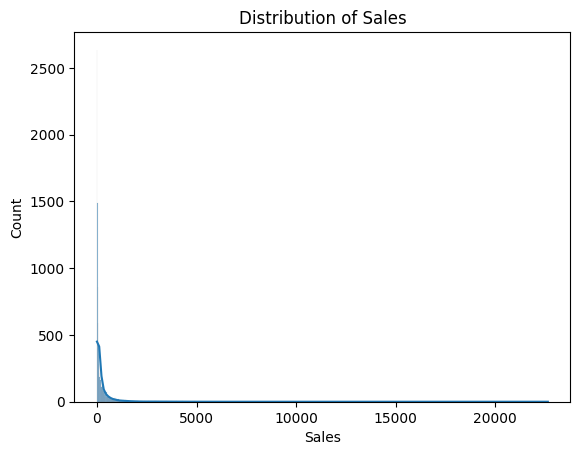

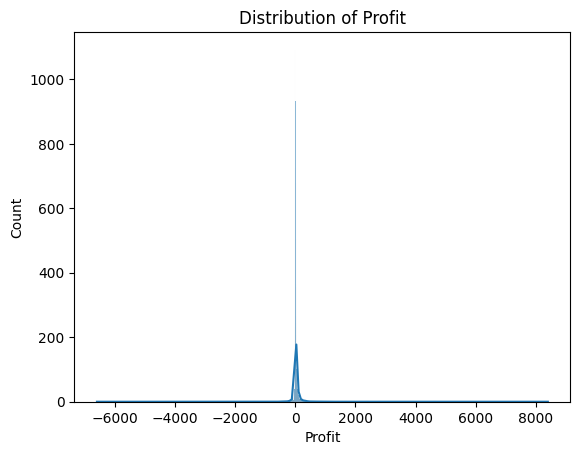

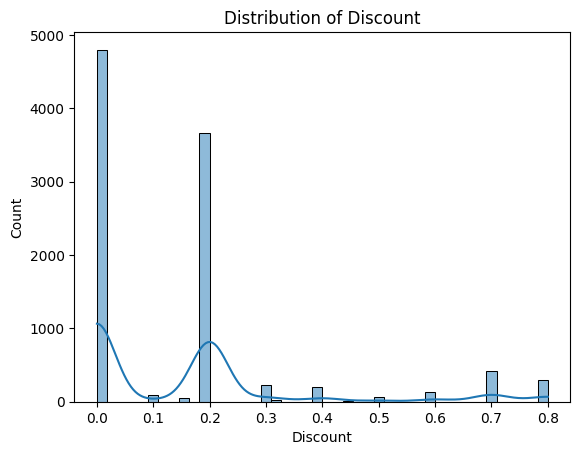

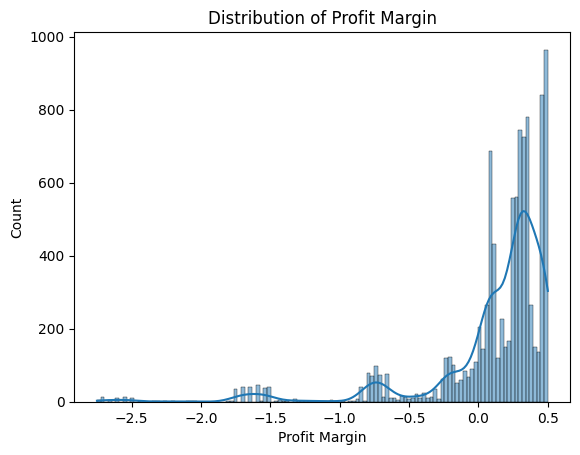

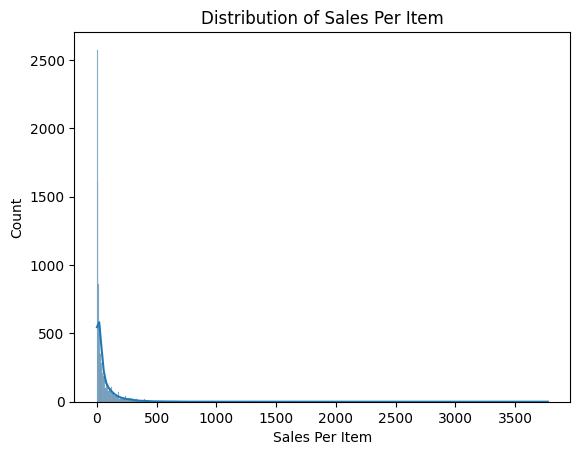

In [46]:
for feature in selected_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


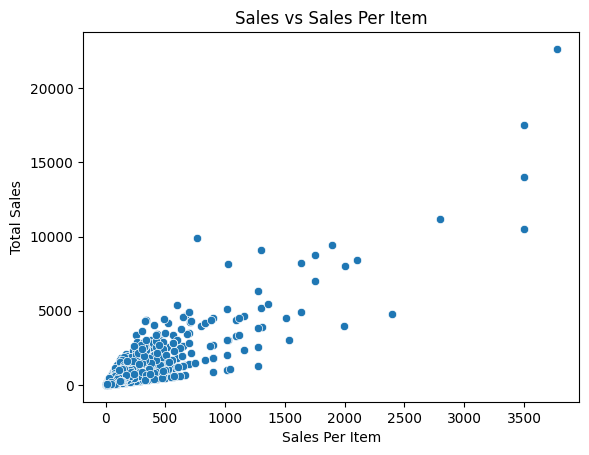

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Sales Per Item', y='Sales')
plt.title('Sales vs Sales Per Item')
plt.xlabel('Sales Per Item')
plt.ylabel('Total Sales')
plt.show()


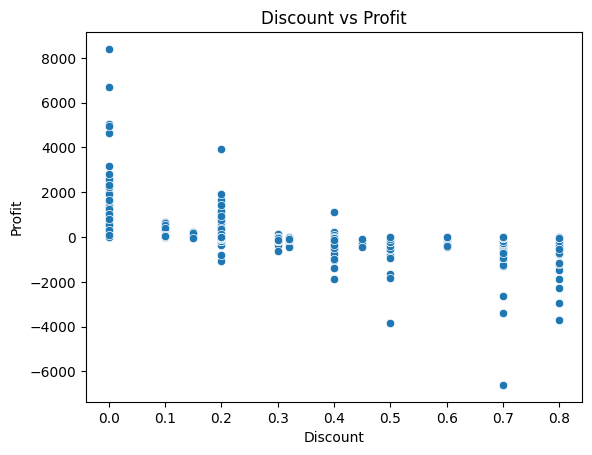

In [60]:
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


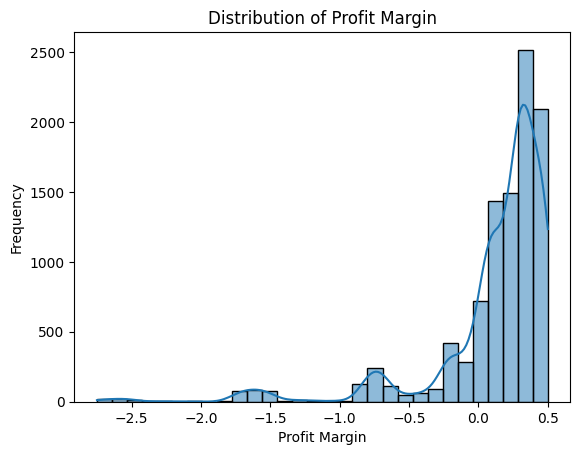

In [61]:
sns.histplot(df['Profit Margin'], kde=True, bins=30)
plt.title('Distribution of Profit Margin')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.show()


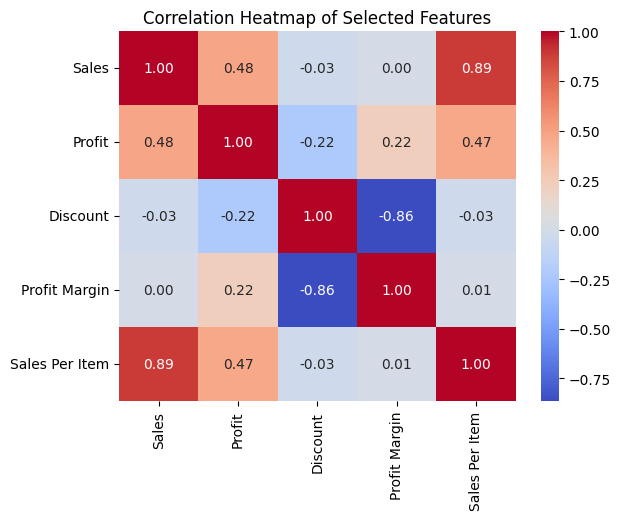

In [62]:
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Profit Margin', 'Sales Per Item']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns


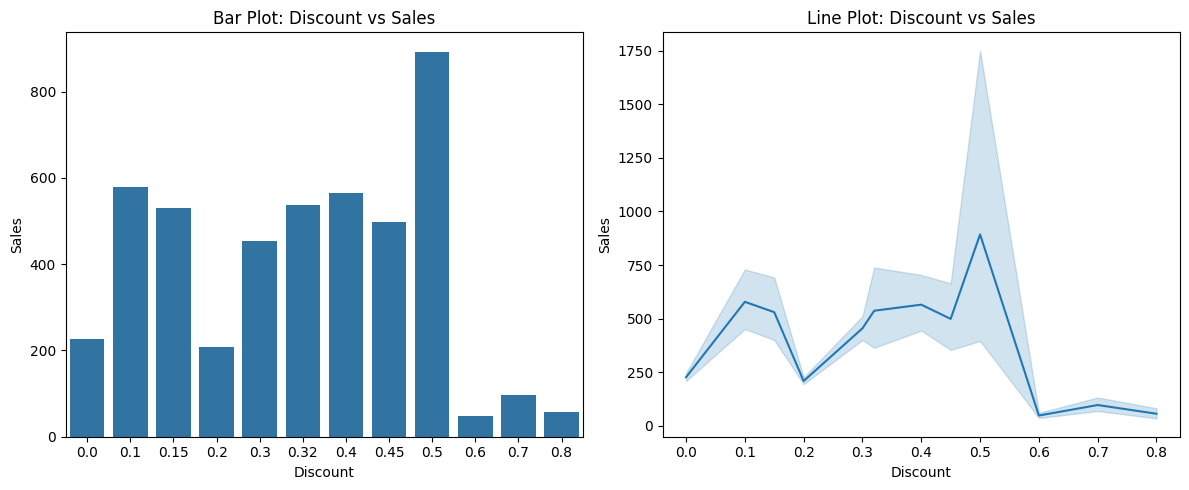

🔁 Correlation between Discount and Sales: -0.03


In [65]:
plt.figure(figsize=(12, 5))

# Bar plot
plt.subplot(1, 2, 1)
sns.barplot(x=df['Discount'], y=df['Sales'], estimator='mean', ci=None)
plt.title('Bar Plot: Discount vs Sales')

# Line plot
plt.subplot(1, 2, 2)
sns.lineplot(x='Discount', y='Sales', data=df)
plt.title('Line Plot: Discount vs Sales')

plt.tight_layout()
plt.show()

# 1. Discount vs Sales
corr_ds = df['Discount'].corr(df['Sales'])
print(f"🔁 Correlation between Discount and Sales: {corr_ds:.2f}")

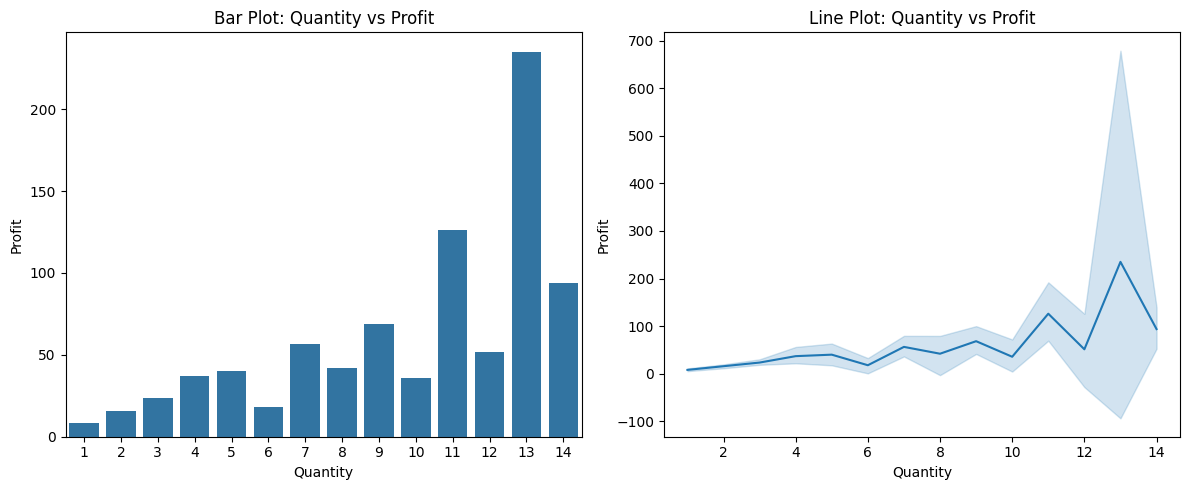

🔁 Correlation between Quantity and Profit: 0.07


In [67]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=df['Quantity'], y=df['Profit'], estimator='mean', ci=None)
plt.title('Bar Plot: Quantity vs Profit')

plt.subplot(1, 2, 2)
sns.lineplot(x='Quantity', y='Profit', data=df)
plt.title('Line Plot: Quantity vs Profit')

plt.tight_layout()
plt.show()

# 2. Quantity vs Profit
corr_qp = df['Quantity'].corr(df['Profit'])
print(f"🔁 Correlation between Quantity and Profit: {corr_qp:.2f}")

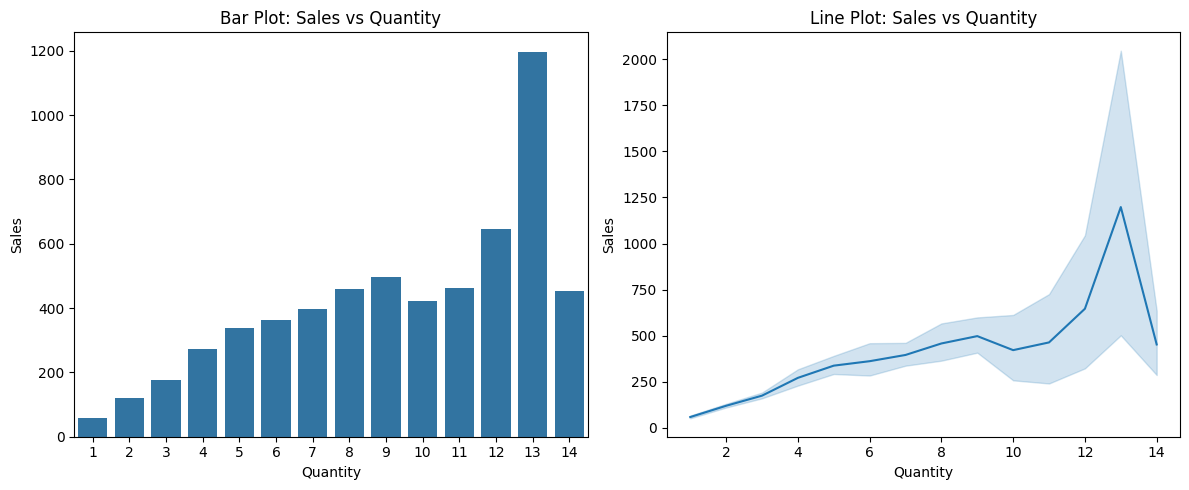

🔁 Correlation between Sales and Quantity: 0.20


In [68]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=df['Quantity'], y=df['Sales'], estimator='mean', ci=None)
plt.title('Bar Plot: Sales vs Quantity')

plt.subplot(1, 2, 2)
sns.lineplot(x='Quantity', y='Sales', data=df)
plt.title('Line Plot: Sales vs Quantity')

plt.tight_layout()
plt.show()

# 3. Sales vs Quantity
corr_sq = df['Sales'].corr(df['Quantity'])
print(f"🔁 Correlation between Sales and Quantity: {corr_sq:.2f}")

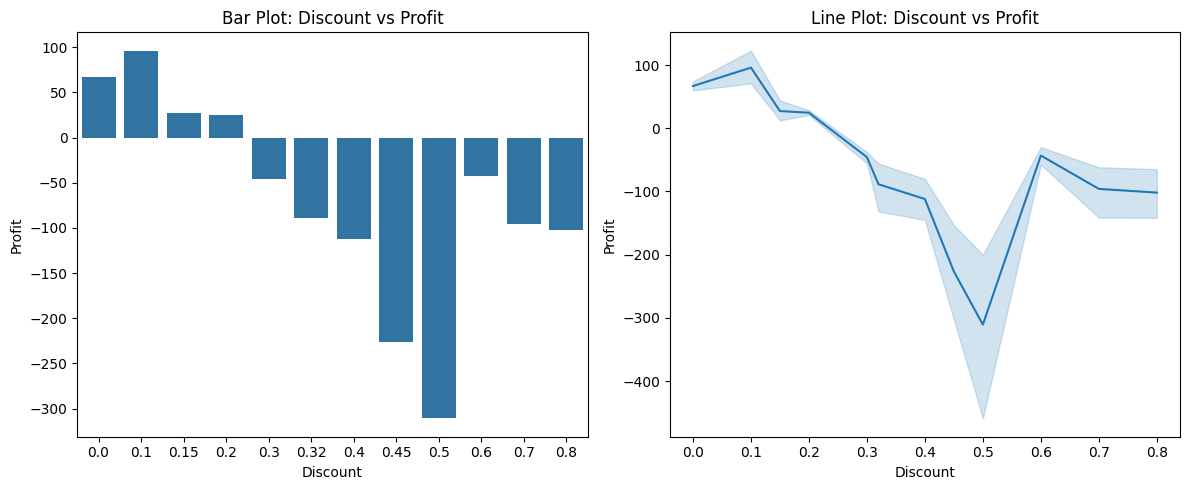

🔁 Correlation between Discount and Profit: -0.22


In [69]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=df['Discount'], y=df['Profit'], estimator='mean', ci=None)
plt.title('Bar Plot: Discount vs Profit')

plt.subplot(1, 2, 2)
sns.lineplot(x='Discount', y='Profit', data=df)
plt.title('Line Plot: Discount vs Profit')

plt.tight_layout()
plt.show()

# 4. Discount vs Profit
corr_dp = df['Discount'].corr(df['Profit'])
print(f"🔁 Correlation between Discount and Profit: {corr_dp:.2f}")

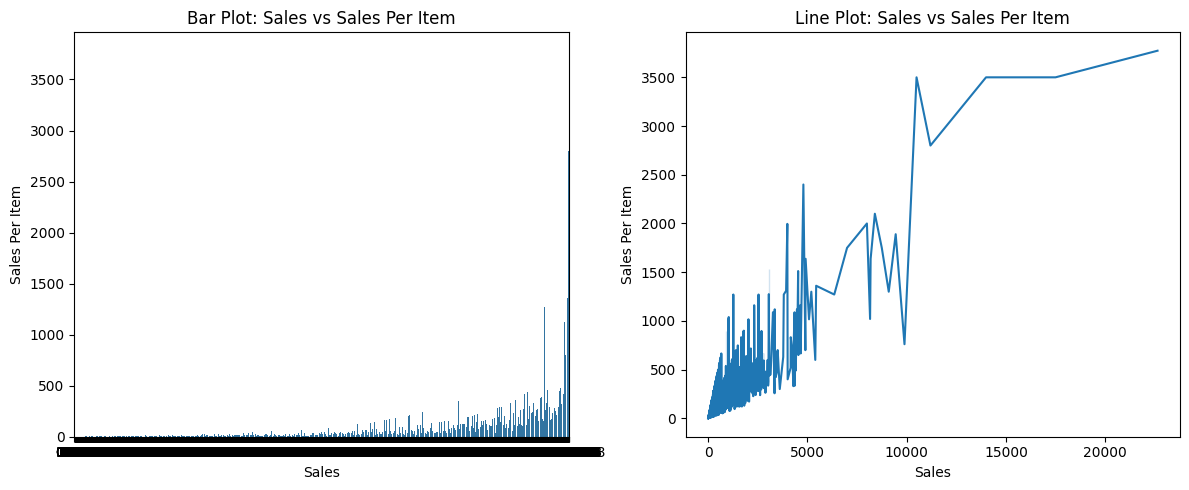

🔁 Correlation between Sales and Sales Per Item: 0.89


In [70]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=df['Sales'], y=df['Sales Per Item'], estimator='mean', ci=None)
plt.title('Bar Plot: Sales vs Sales Per Item')

plt.subplot(1, 2, 2)
sns.lineplot(x='Sales', y='Sales Per Item', data=df)
plt.title('Line Plot: Sales vs Sales Per Item')

plt.tight_layout()
plt.show()

# 5. Sales vs Sales Per Item (you must have created this column first)
corr_spi = df['Sales'].corr(df['Sales Per Item'])
print(f"🔁 Correlation between Sales and Sales Per Item: {corr_spi:.2f}")


# **Top 5 Product Name and its Sales**

In [72]:
# Group by Product Name and sum the Sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=True)

# Show top 5 selling products
top_5 = top_products.head(5)
print(top_5)


Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac    1.624
Avery 5                                                             5.760
Xerox 20                                                            6.480
Grip Seal Envelopes                                                 7.072
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                  7.700
Name: Sales, dtype: float64


In [74]:
top5_selling_products = df.groupby(['Product Name'])['Sales'].sum().sort_values(ascending=False).reset_index().head()
top5_selling_products

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479


# **Visualize In Bar Chart Top 5 Selling Products**

In [87]:
top5_selling_products = df.groupby(['Product Name'])['Sales'].sum().sort_values(ascending=False).reset_index().head()

In [88]:
fig = px.bar(top5_selling_products,x= top5_selling_products['Product Name'] ,y='Sales',
            template='plotly_dark',
            color_discrete_sequence=[["#be9b7b","#fff4e6","#3c2f2f","#b1e7cd ","#45B39D"]] ,
            title='the top 5 selling products in the superstore '.upper() ,
            text_auto=True , 
            
            )

fig.update_layout(
   xaxis_title='Sales',
)

iplot(fig)


# **Top 5 Profitable Products** 

In [89]:
# Group by product name and sum the Profit
top5_profitable_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(5)

# Display top 5 profitable products with profit values
for product, profit in top5_profitable_products.items():
    print(f"{product}: ${profit:,.2f}")


Canon imageCLASS 2200 Advanced Copier: $25,199.93
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind: $7,753.04
Hewlett Packard LaserJet 3310 Copier: $6,983.88
Canon PC1060 Personal Laser Copier: $4,570.93
HP Designjet T520 Inkjet Large Format Printer - 24" Color: $4,094.98


**Fig Bar Chart**

In [91]:
fig = px.bar(top5_profitable_products,x = top5_profitable_products ,
            template='plotly_dark',
            color= top5_profitable_products,
            title='the top profitable products in the superstore '.upper() ,
            text_auto=True , 
            
            )

fig.update_layout(
   xaxis_title='total profit ',
)

iplot(fig)

# **Sales Trend Over Time (monthly, yearly)**

****✅ Step 1: Convert Order Date to DateTime****

In [92]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


**✅ Step 2: Create Monthly and Yearly Columns**

In [93]:
# Extract year and month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.to_period('M')  # 'YYYY-MM' format


**📊 Step 3: Monthly Sales Trend**

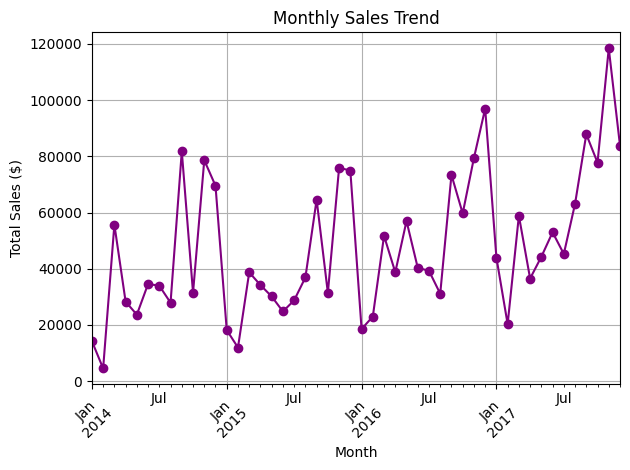

In [94]:
# Group by month and sum sales
monthly_sales = df.groupby('Month')['Sales'].sum()

# Plot
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**📊 Step 4: Yearly Sales Trend**

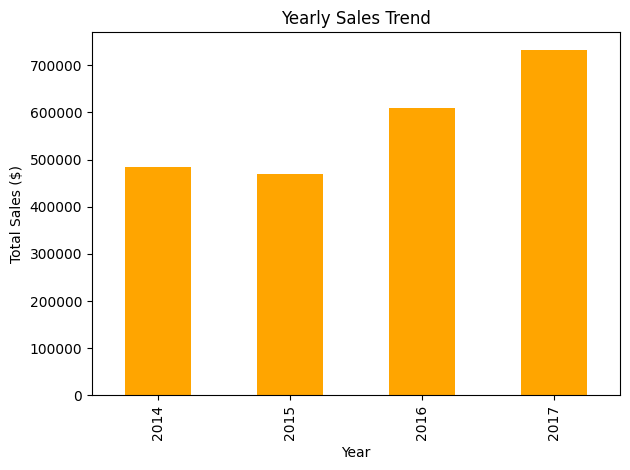

In [95]:
# Group by year
yearly_sales = df.groupby('Year')['Sales'].sum()

# Plot
yearly_sales.plot(kind='bar', color='orange')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()


# **Products Generates The Highest Profit**

In [110]:
category = df.groupby('Category')['Profit'].sum().sort_values(ascending=False).reset_index()
category

,Category,Profit
0,Technology,145454.9481
1,Office Supplies,122490.8008
2,Furniture,18451.2728


**📊 Visualize with Plotly**

In [111]:
import plotly.express as px

# Create a DataFrame from the category profit series
category_profit = df.groupby('Category')['Profit'].sum().reset_index()

# Plotly bar chart
fig = px.bar(
    category_profit,
    x='Profit',
    y='Category',
    template='plotly_dark',
    color_discrete_sequence=['#45B39D'],  # Or pick any hex color
    text_auto=True,
    orientation='h'
)

fig.update_layout(
    bargap=0.6,
    title='Total Profit for Each Category',
    xaxis_title='Profit ($)',
    yaxis_title='Category'
)

fig.show()


**✅ Pie Chart of Profit by Category**

In [112]:
import plotly.express as px

# Prepare data
category_profit = df.groupby('Category')['Profit'].sum().reset_index()

# Create pie chart
fig = px.pie(
    category_profit,
    names='Category',
    values='Profit',
    title='Profit Distribution by Category',
    color_discrete_sequence=px.colors.sequential.Teal,
    template='plotly_dark',
    hole=0.4  # Optional: donut style
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


# **Discount and Sales**

**🔹 1. Check Correlation**

In [113]:
correlation = df['Discount'].corr(df['Sales'])
print(f"Correlation between Discount and Sales: {correlation:.2f}")


Correlation between Discount and Sales: -0.03


**🔹 2. Visualize with Scatter Plot**

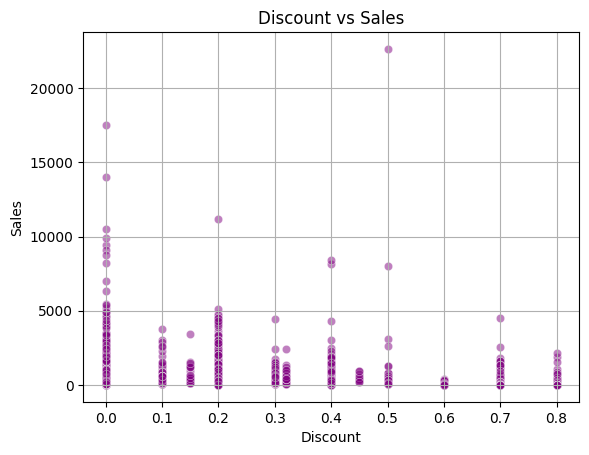

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Discount', y='Sales', color='purple', alpha=0.5)
plt.title('Discount vs Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


**Average Sales at Different Discount Levels**

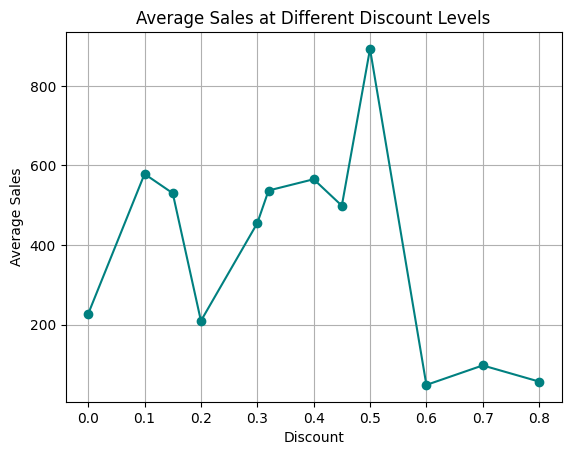

In [115]:
discount_sales = df.groupby('Discount')['Sales'].mean().reset_index()

plt.plot(discount_sales['Discount'], discount_sales['Sales'], marker='o', color='teal')
plt.title('Average Sales at Different Discount Levels')
plt.xlabel('Discount')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()


# **Average Profit Margin For Each Product Category**

**🔹 1. Create a Profit Margin Column**

In [116]:
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) 


**🔹 2. Group by Category and Calculate Average Margin**

In [117]:
category_margin = df.groupby('Category')['Profit Margin (%)'].mean().sort_values(ascending=False)
print(category_margin)


Category
Technology         0.156138
Office Supplies    0.138030
Furniture          0.038784
Name: Profit Margin (%), dtype: float64


**📊 Visualize as Bar Chart**

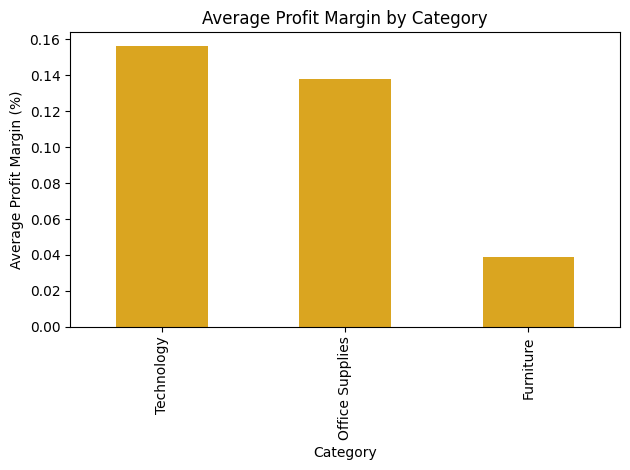

In [118]:
import matplotlib.pyplot as plt

category_margin.plot(kind='bar', color='goldenrod')
plt.title('Average Profit Margin by Category')
plt.ylabel('Average Profit Margin (%)')
plt.xlabel('Category')
plt.tight_layout()
plt.show()



**Furniture average profit margin is equal 0.04**

**Office Supplies average profit margin is equal 0.14**

**Technology average profit margin is equal 0.16**


# **📊 Week 1 – Data Understanding & Visualization**

**Project Title: Sales Trends Analysis of a Superstore**

**🧠 Objective:**

This project aims to explore and visualize the Superstore Sales Dataset to understand sales performance, profitability, and customer purchasing behavior across various product categories, regions, and time periods.

**🎯 Goals:**

Understand the structure and types of data in the dataset.

Clean and preprocess the dataset (e.g., handle missing values, parse dates).

Perform exploratory data analysis (EDA).

Visualize key patterns and insights using charts.

**📁 Dataset Used:**

Superstore Sales Dataset (Kaggle):
Contains sales transactions including:

Product details (Category, Sub-Category, Product Name)

Financial metrics (Sales, Profit, Discount)

Temporal data (Order Date, Ship Date)

Geographic data (Region, State, City)

Customer behavior

# *🛠️ Steps Performed:*

**1. Data Loading & Cleaning**

Loaded CSV using pandas

Parsed dates (Order Date, Ship Date)

Checked for and confirmed no missing values

**2. Feature Engineering**

Created Sales Per Item = Sales / Quantity

Created Profit Margin = Profit / Sales

Normalized key features for modeling

**3. Exploratory Data Analysis (EDA)**

**🔹 Profit & Sales Trends:**

Top Selling Products identified by highest total Sales

Top Profitable Products based on highest total Profit

Sales Trends Over Time (monthly, yearly)

Category-wise Profitability and regional breakdown

**🔹 Correlation Analysis:**

Discount ↔ Sales: Negligible correlation (−0.03)

Quantity ↔ Profit: Weak correlation (0.07)

Sales ↔ Profit: Moderate correlation (0.48)

Sales ↔ Sales Per Item: Strong correlation (0.89)

**🔹 Visualizations:**

Bar plots, scatter plots, heatmaps, pie charts using:

matplotlib

seaborn

plotly.express (interactive)

**💡 Key Insights:**

Technology category contributes the highest profit.

Canon imageCLASS products are top profit-generators.

Discounts do not significantly increase sales.

Western and Eastern regions dominate profitability.

Sales per item is a strong predictor of profit.

**📦 Output:**

Cleaned and transformed dataset ready for modeling

Clear visual summary of sales behavior and business performance